In [1]:
# this is my second example in the logistic regressin.
# hire i will work with social_newtwork data .
# the idea is doing an exploratore data and do the regression model

In [2]:
# import the library
import pandas as pd
import numpy as np

In [3]:
# loading the data

In [4]:
social_network=pd.read_csv("C:\\Users\\marce\\OneDrive\\Ambiente de Trabalho\\DataScience\\logistic_regression\\Social_Network_Ads.csv")

In [5]:
social_network.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [6]:
# looking for ditails
social_network.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
social_network.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [8]:
# lokking for missing value

In [9]:
missing_value=social_network.isna()

In [10]:
missing_value

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [11]:
# i can use de sum 
missing_value=social_network.isna().sum()

In [12]:
missing_value

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [13]:
# as we can see, we have no  missing value

In [14]:
# now, let's define de x variable and y variable independent and dependent variable


In [15]:
x = social_network.iloc[:,[2,3]].values # when i put value, it create an array 
y = social_network.iloc[:, 4].values

In [16]:
x

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [17]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [18]:
# so now i have my x and y, let's start to split my data so, we have to  import the sklearn library

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=0 )b

SyntaxError: invalid syntax (<ipython-input-20-2f8313b2c8e0>, line 1)

In [ ]:
x_train

In [ ]:
# stantarlise my machine learning algorithme to get better numerical input

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc_X=StandardScaler()

In [ ]:
sc_X

In [ ]:
# traing and testing my sc_x
x_train=sc_X.fit_transform(x_train)
x_test=sc_X.fit_transform(x_test)

In [21]:
# create my logistic regression 

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lg_reg=LogisticRegression(random_state=0)

In [24]:
# training my model\
lg_reg.fit(x_train,y_train)

NameError: name 'x_train' is not defined

In [ ]:
lg_reg

In [25]:
# prediting y

In [26]:
y_predit=lg_reg.predict(x_test)

NameError: name 'x_test' is not defined

In [27]:
y_predit 

NameError: name 'y_predit' is not defined

In [28]:
from sklearn import metrics
# Printing the confusion matrix
# The columns will show the instances predicted for each label,
# and the rows will show the actual number of instances for each label.
print(metrics.confusion_matrix(y_test, y_predit, labels=[0, 1]))
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_test, y_predit, labels=[0, 1]))

NameError: name 'y_test' is not defined

In [29]:

# Visualising the Training set results
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train#just assign the variable soo that we dont need to change it every time
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))#here we set the limit 
plt.contourf(X1, X2, lg_reg.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),#real magic starts here
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

NameError: name 'x_train' is not defined

<AxesSubplot:>

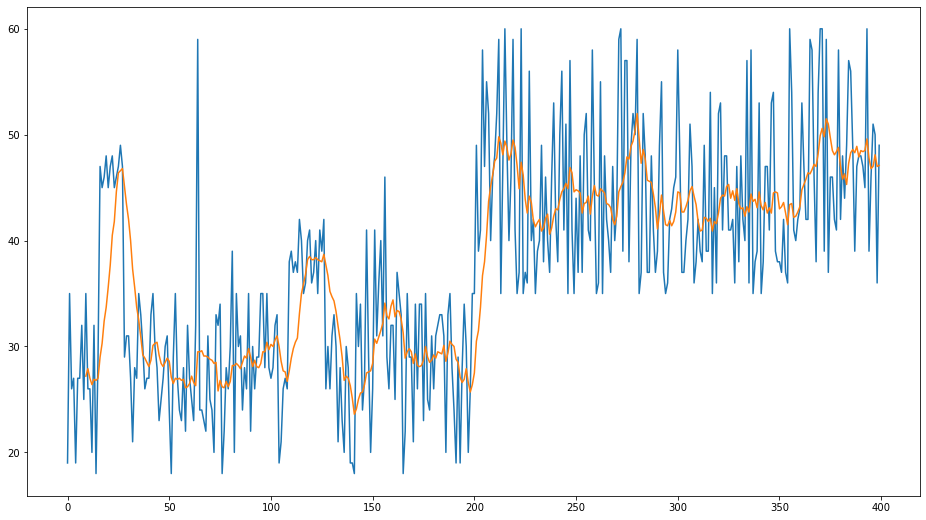

In [31]:
# plot the values
social_network['Age'].plot(figsize=(16,9))

# plot the rolling mean
social_network['Age'].rolling(10).mean().plot(figsize=(16,9))